In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data
data = pd.read_csv('./data.csv')

In [3]:
# check Nan
# great that we do not have any
nan_count = data.isnull().sum()
print(nan_count)

date               0
signal             0
spy_close_price    0
dtype: int64


In [4]:
data.head()

,date,signal,spy_close_price
0,20120103,3.107767,127.495
1,20120104,3.107282,127.700
2,20120105,3.099757,128.040
3,20120106,3.134223,127.710
4,20120109,3.135922,128.020


In [5]:
data.tail()

,date,signal,spy_close_price
662,20140825,4.869175,200.20
663,20140826,4.866505,200.33
664,20140827,4.859468,200.25
665,20140828,4.881311,200.14
666,20140829,4.868689,200.71


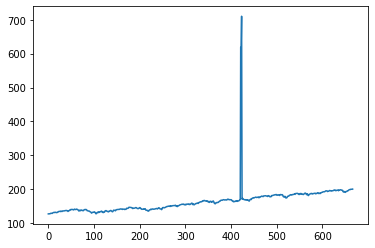

In [6]:
# plot spy
# and we find a spike, which is likely an anomaly
data['spy_close_price'].plot()

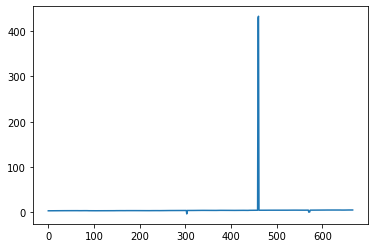

In [7]:
# plot signal
# and we find a spike, which is likely an anomaly
# there are also two small dips
data['signal'].plot()

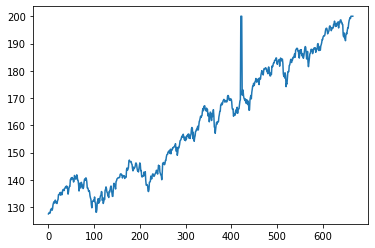

In [8]:
# we remove the anomaly and draw the price to find any potential issues
# we set the anomaly to 200 just for the purpose of seeing a well scaled graph
data['spy_close_price'].apply(lambda x: x if abs(x)<200 else 200).plot()

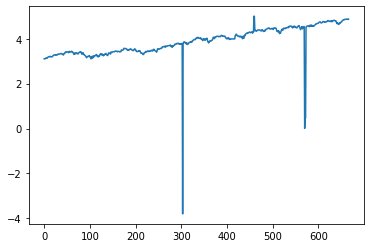

In [9]:
# we remove the anomaly and draw the signal to find any potential issues
# we set the anomaly to 5 just for the purpose of seeing a well scaled graph
# we find that there are two other anomaly that we need to take care
data['signal'].apply(lambda x: x if abs(x)<5 else 5).plot()

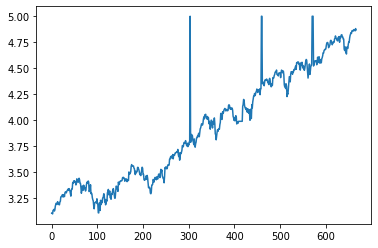

In [10]:
# just to see more clearly
data['signal'].apply(lambda x: x if 2<x<5 else 5).plot()

In [11]:
# we try to locate the anomaly in the spy_close_price
# for spy_close_price, we find the anomaly at 20130912-20130913
# it seems like the decimal and hundred digits are switched, that's intereseting
data.iloc[420:440]

,date,signal,spy_close_price
420,20130911,4.200267,169.400
421,20130912,4.193204,618.950
422,20130913,4.143689,619.330
423,20130916,4.124515,710.310
424,20130917,4.114806,171.070
425,20130918,4.102913,173.051
426,20130919,4.118689,172.760
427,20130920,4.099733,170.720
428,20130923,4.077913,169.930
429,20130924,4.110194,169.530


In [12]:
# so I download price from yahoo finance and try to find out what's going on
# and guess what, its true that hundred and decimal are switched !
# but lets assume we still live in the dark age and we do not have third party information
spy = pd.read_csv('./SPY.csv')
spy[(spy['Date']>='2013-09-12') & (spy['Date']<='2013-09-16')]

,Date,Open,High,Low,Close,Adj Close,Volume
425,2013-09-12,169.339996,169.559998,168.720001,168.949997,147.115494,83209000
426,2013-09-13,169.130005,169.460007,168.740005,169.330002,147.446350,72727800
427,2013-09-16,171.160004,171.240005,170.039993,170.309998,148.299713,106299200


In [13]:
# we try to locate the anomaly in the signal
# we first deal with the exploding value
# for signal anomaly we find it at 20131105-20131106 
# and it seems they are just off by 100 times
# we have no source to confirm or discredit our guess, so we will not try to fix it here
data.iloc[450:470]

,date,signal,spy_close_price
450,20131023,4.278883,174.57
451,20131024,4.266748,175.15
452,20131025,4.276942,175.95
453,20131028,4.291990,176.23
454,20131029,4.278398,177.17
455,20131030,4.300243,176.29
456,20131031,4.245874,175.79
457,20131101,4.303155,176.21
458,20131104,4.303883,176.83
459,20131105,429.514563,176.27


In [14]:
# we then deal with the negative value
# for signal anomaly we find it at 20130326
# it seems the sign is flipped, but we will not try to correct it
data.iloc[300:310]

,date,signal,spy_close_price
300,20130321,3.760922,154.359
301,20130322,3.791019,155.600
302,20130325,3.791019,154.950
303,20130326,-3.802670,156.190
304,20130327,3.787621,156.190
305,20130328,3.806311,156.670
306,20130401,3.863835,156.050
307,20130402,3.854369,156.820
308,20130403,3.851214,155.230
309,20130404,3.804612,155.860


In [15]:
# we then deal with the negative value
# for signal anomaly we find it at 20140414-20140416
# it seems that the values are off by 1000, 100, 100 respectively
data.iloc[560:580]

,date,signal,spy_close_price
560,20140331,4.474272,187.0100
561,20140401,4.405583,188.2500
562,20140402,4.445510,188.8800
563,20140403,4.492718,188.6300
564,20140404,4.541019,186.4000
565,20140407,4.440294,184.3400
566,20140408,4.470874,185.1000
567,20140409,4.517597,187.0900
568,20140410,4.524029,183.1550
569,20140411,4.539806,181.5100


In [16]:
# now we have find the anomalies
# we can be either aggressive in our approach to fix them (using our guess) or 
# we can be more conservative in assuming that we have no knowledge of the real value
# we take the second approach here since usually we are not so lucky to spot these kind of error
# regardless, since there are only a few anomalies, the result of two treatments will not be very different

In [17]:
filter_data = data.drop([421, 422, 423, 459, 460, 303, 570, 571, 572])

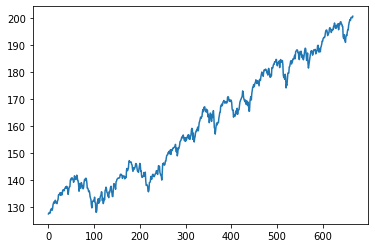

In [18]:
# lets plot again!
# plot spy
filter_data['spy_close_price'].plot()

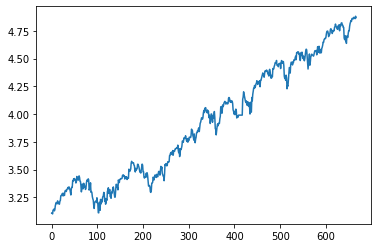

In [19]:
# lets plot again!
# plot signal
filter_data['signal'].plot()

In [20]:
# signal and spy looks the same! that's interesting
# but we really want to know if signal(t-1) can be predictive of return(t), so lets try
# we will first calculate returns as y 
# for the features, we will use signal and change in signal, lets see if these two will work before making more

In [21]:
# shift signal (lag by 1), call it pit(point in time)signal, since we can only use signal at t-1 to predict 
# return at t
filter_data['pit_signal'] = filter_data['signal'].shift(1) 

In [22]:
# find return for p days without looking ahead, we call it [p]day_return
# it is indeed calculated by looking ahead
# we use 5 days here
r_days = 5
for i in range(1,r_days+1):
    filter_data[f'{i}day_return'] = filter_data['spy_close_price'].shift(-i)/ filter_data['spy_close_price']  - 1

In [23]:
# we can also add return as features
# they are backward looking features
r_days = 5
for i in range(1,r_days+1):
    filter_data[f'{i}day_return_signal'] = (filter_data['spy_close_price'].shift(i)/ filter_data['spy_close_price']  - 1).shift(1)

In [24]:
# find the change in signal, call it k_pit_signal where k is the lag
# we use 5
s_days = 5
for i in range(1,s_days+1):
    filter_data[f'{i}_pit_signal'] = filter_data['pit_signal'] / filter_data['pit_signal'].shift(i) - 1

In [25]:
# lets take a look at the DF
filter_data

,date,signal,spy_close_price,pit_signal,1day_return,2day_return,3day_return,4day_return,5day_return,1day_return_signal,2day_return_signal,3day_return_signal,4day_return_signal,5day_return_signal,1_pit_signal,2_pit_signal,3_pit_signal,4_pit_signal,5_pit_signal
0,20120103,3.107767,127.495,NaN,0.001608,0.004275,0.001686,0.004118,0.012824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20120104,3.107282,127.700,3.107767,0.002662,0.000078,0.002506,0.011198,0.011746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20120105,3.099757,128.040,3.107282,-0.002577,-0.000156,0.008513,0.009060,0.011481,-0.001605,NaN,NaN,NaN,NaN,-0.000156,NaN,NaN,NaN,NaN
3,20120106,3.134223,127.710,3.099757,0.002427,0.011119,0.011667,0.014094,0.008848,-0.002655,-0.004256,NaN,NaN,NaN,-0.002421,-0.002577,NaN,NaN,NaN
4,20120109,3.135922,128.020,3.134223,0.008671,0.009217,0.011639,0.006405,0.010311,0.002584,-0.000078,-0.001684,NaN,NaN,0.011119,0.008671,0.008513,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,20140825,4.869175,200.200,4.871602,0.000649,0.000250,-0.000300,0.002547,NaN,0.001556,-0.001355,-0.004016,-0.009187,-0.017421,0.002848,0.002297,0.001897,0.002547,0.007631
663,20140826,4.866505,200.330,4.869175,-0.000399,-0.000948,0.001897,NaN,NaN,-0.005045,-0.003497,-0.006394,-0.009041,-0.014186,-0.000498,0.002348,0.001798,0.001398,0.002048
664,20140827,4.859468,200.250,4.866505,-0.000549,0.002297,NaN,NaN,NaN,-0.000649,-0.005691,-0.004143,-0.007038,-0.009684,-0.000548,-0.001046,0.001799,0.001248,0.000849
665,20140828,4.881311,200.140,4.859468,0.002848,NaN,NaN,NaN,NaN,0.000400,-0.000250,-0.005293,-0.003745,-0.006642,-0.001446,-0.001993,-0.002491,0.000350,-0.000199


In [26]:
# remove NaN
working_data = filter_data.dropna()
working_data = working_data.reset_index(drop=True)

In [27]:
working_data

,date,signal,spy_close_price,pit_signal,1day_return,2day_return,3day_return,4day_return,5day_return,1day_return_signal,2day_return_signal,3day_return_signal,4day_return_signal,5day_return_signal,1_pit_signal,2_pit_signal,3_pit_signal,4_pit_signal,5_pit_signal
0,20120111,3.127184,129.20,3.143447,0.002399,-0.002786,0.001084,0.012152,0.017492,-0.008596,-0.010997,-0.008441,-0.011074,-0.012662,0.002399,0.002943,0.014094,0.011639,0.011481
1,20120112,3.139320,129.51,3.127184,-0.005173,-0.001313,0.009729,0.015057,0.018840,-0.000542,-0.009133,-0.011533,-0.008978,-0.011610,-0.005173,-0.002786,-0.002246,0.008848,0.006405
2,20120113,3.174029,128.84,3.139320,0.003881,0.014980,0.020335,0.024138,0.021500,-0.002394,-0.002934,-0.011505,-0.013899,-0.011350,0.003881,-0.001313,0.001084,0.001626,0.012763
3,20120117,3.190777,129.34,3.174029,0.011056,0.016391,0.020179,0.017551,0.016391,0.005200,0.002794,0.002251,-0.006364,-0.008771,0.011056,0.014980,0.009729,0.012152,0.012700
4,20120118,3.202670,130.77,3.190777,0.005276,0.009023,0.006423,0.005276,0.013688,-0.003866,0.001314,-0.001082,-0.001624,-0.010206,0.005276,0.016391,0.020335,0.015057,0.017492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,20140818,4.859223,197.36,4.834709,0.005219,0.007904,0.010843,0.009272,0.014390,0.000204,-0.004496,-0.011189,-0.009835,-0.012671,-0.001554,0.001357,0.004032,0.009272,0.017729
643,20140819,4.862379,198.39,4.859223,0.002672,0.005595,0.004032,0.009123,0.009779,-0.008310,-0.008107,-0.012769,-0.019406,-0.018063,0.005071,0.003509,0.006435,0.009123,0.014390
644,20140820,4.860437,198.92,4.862379,0.002916,0.001357,0.006435,0.007088,0.006686,-0.005192,-0.013458,-0.013257,-0.017894,-0.024497,0.000649,0.005723,0.004160,0.007088,0.009779
645,20140821,4.857767,199.50,4.860437,-0.001554,0.003509,0.004160,0.003759,0.003208,-0.002664,-0.007842,-0.016087,-0.015886,-0.020511,-0.000399,0.000250,0.005322,0.003759,0.006686


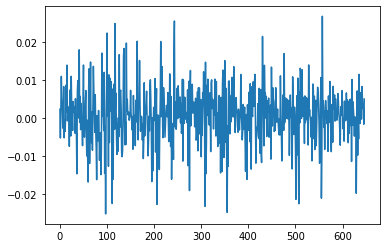

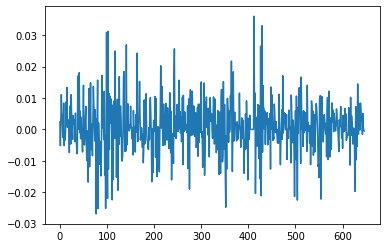

In [28]:
# we now have some stationary time series data, thats good
working_data['1day_return'].plot()
plt.show()
working_data['1_pit_signal'].plot()
plt.show()

In [29]:
# now we have the clean data, lets do a train test split
# we will use first 75% for our research and the remaing 25% for testing purpose
l1 = int(len(working_data)*.75)
in_sample = working_data.iloc[:l1]
out_sample = working_data.iloc[l1:]

In [30]:
# take a look at in sample
in_sample

,date,signal,spy_close_price,pit_signal,1day_return,2day_return,3day_return,4day_return,5day_return,1day_return_signal,2day_return_signal,3day_return_signal,4day_return_signal,5day_return_signal,1_pit_signal,2_pit_signal,3_pit_signal,4_pit_signal,5_pit_signal
0,20120111,3.127184,129.200,3.143447,0.002399,-0.002786,0.001084,0.012152,0.017492,-0.008596,-0.010997,-0.008441,-0.011074,-0.012662,0.002399,0.002943,0.014094,0.011639,0.011481
1,20120112,3.139320,129.510,3.127184,-0.005173,-0.001313,0.009729,0.015057,0.018840,-0.000542,-0.009133,-0.011533,-0.008978,-0.011610,-0.005173,-0.002786,-0.002246,0.008848,0.006405
2,20120113,3.174029,128.840,3.139320,0.003881,0.014980,0.020335,0.024138,0.021500,-0.002394,-0.002934,-0.011505,-0.013899,-0.011350,0.003881,-0.001313,0.001084,0.001626,0.012763
3,20120117,3.190777,129.340,3.174029,0.011056,0.016391,0.020179,0.017551,0.016391,0.005200,0.002794,0.002251,-0.006364,-0.008771,0.011056,0.014980,0.009729,0.012152,0.012700
4,20120118,3.202670,130.770,3.190777,0.005276,0.009023,0.006423,0.005276,0.013688,-0.003866,0.001314,-0.001082,-0.001624,-0.010206,0.005276,0.016391,0.020335,0.015057,0.017492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,20131223,4.482767,182.530,4.461650,0.002191,0.002191,0.007259,0.007204,0.007067,-0.000386,0.000771,-0.016028,-0.012910,-0.019002,-0.000136,-0.000190,0.004865,0.007067,0.012448
481,20131224,4.439806,182.930,4.482767,0.000000,0.005057,0.005002,0.004865,0.009621,-0.005314,-0.005698,-0.004547,-0.021257,-0.018156,0.004733,0.004596,0.004542,0.009621,0.011834
482,20131225,4.439806,182.930,4.439806,0.005057,0.005002,0.004865,0.009621,0.009621,-0.002187,-0.007489,-0.007872,-0.006724,-0.023397,-0.009584,-0.004896,-0.005031,-0.005086,-0.000055
483,20131226,4.438956,183.855,4.439806,-0.000054,-0.000190,0.004542,0.004542,-0.005276,0.000000,-0.002187,-0.007489,-0.007872,-0.006724,0.000000,-0.009584,-0.004896,-0.005031,-0.005086


In [31]:
# take a look at out of sample
out_sample

,date,signal,spy_close_price,pit_signal,1day_return,2day_return,3day_return,4day_return,5day_return,1day_return_signal,2day_return_signal,3day_return_signal,4day_return_signal,5day_return_signal,1_pit_signal,2_pit_signal,3_pit_signal,4_pit_signal,5_pit_signal
485,20131230,4.453398,183.820,4.426214,0.004733,0.004733,-0.005086,-0.007943,-0.001850,0.000054,-0.004977,-0.004977,-0.007153,-0.012429,-0.002871,-0.003061,-0.003061,-0.012616,-0.007943
486,20131231,4.454369,184.690,4.453398,0.000000,-0.009773,-0.012616,-0.006552,-0.006335,0.000136,0.000190,-0.004842,-0.004842,-0.007018,0.006142,0.003253,0.003061,0.003061,-0.006552
487,20140101,4.454369,184.690,4.454369,-0.009773,-0.012616,-0.006552,-0.006335,-0.005685,-0.004711,-0.004575,-0.004521,-0.009529,-0.009529,0.000218,0.006361,0.003472,0.003280,0.003280
488,20140102,4.457282,182.885,4.454369,-0.002871,0.003253,0.003472,0.004128,0.006862,0.000000,-0.004711,-0.004575,-0.004521,-0.009529,0.000000,0.000218,0.006361,0.003472,0.003280
489,20140103,4.409830,182.360,4.457282,0.006142,0.006361,0.007019,0.009761,-0.003701,0.009870,0.009870,0.005113,0.005249,0.005304,0.000654,0.000654,0.000872,0.007019,0.004128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,20140818,4.859223,197.360,4.834709,0.005219,0.007904,0.010843,0.009272,0.014390,0.000204,-0.004496,-0.011189,-0.009835,-0.012671,-0.001554,0.001357,0.004032,0.009272,0.017729
643,20140819,4.862379,198.390,4.859223,0.002672,0.005595,0.004032,0.009123,0.009779,-0.008310,-0.008107,-0.012769,-0.019406,-0.018063,0.005071,0.003509,0.006435,0.009123,0.014390
644,20140820,4.860437,198.920,4.862379,0.002916,0.001357,0.006435,0.007088,0.006686,-0.005192,-0.013458,-0.013257,-0.017894,-0.024497,0.000649,0.005723,0.004160,0.007088,0.009779
645,20140821,4.857767,199.500,4.860437,-0.001554,0.003509,0.004160,0.003759,0.003208,-0.002664,-0.007842,-0.016087,-0.015886,-0.020511,-0.000399,0.000250,0.005322,0.003759,0.006686


lag 1
1 days return
p value is 7.420202744478236e-41
slope is 0.49397783872235446


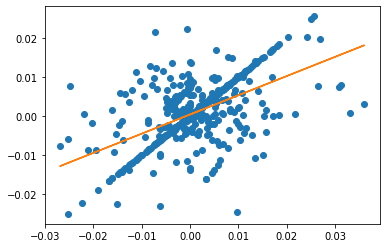

lag 1
2 days return
p value is 4.873123793524783e-25
slope is 0.5568628335848357


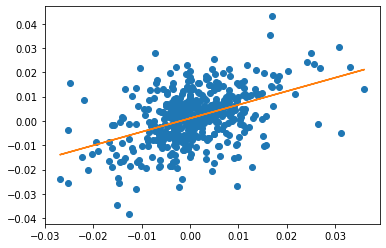

lag 1
3 days return
p value is 7.255519005823923e-17
slope is 0.5567374337987311


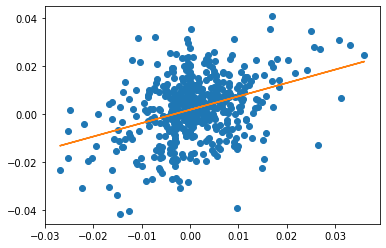

lag 1
4 days return
p value is 7.1353890023109e-21
slope is 0.7105315061241289


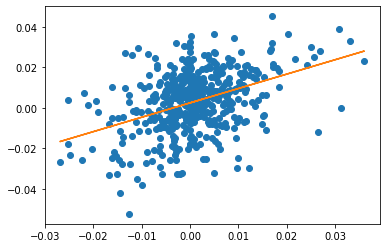

lag 1
5 days return
p value is 2.2905662230425578e-14
slope is 0.6412507613698869


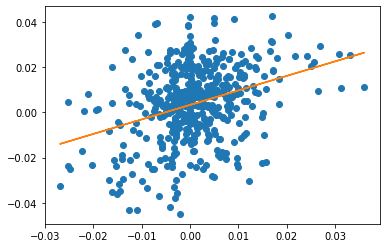

lag 2
1 days return
p value is 3.7279677193891e-28
slope is 0.3133686108188812


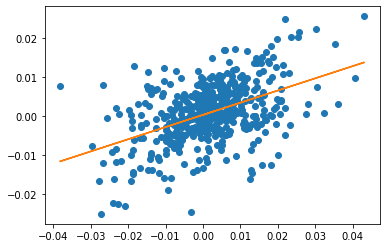

lag 2
2 days return
p value is 2.2536056502576206e-17
slope is 0.34874349484960476


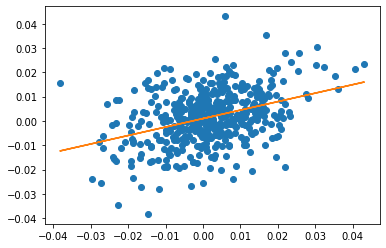

lag 2
3 days return
p value is 3.0143536797830438e-18
slope is 0.4346150236564114


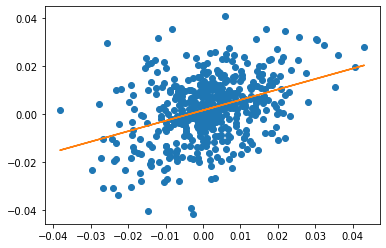

lag 2
4 days return
p value is 4.510568152454017e-17
slope is 0.48177604397344487


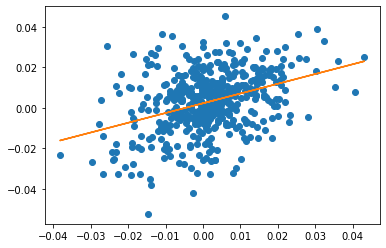

lag 2
5 days return
p value is 1.958921147327911e-11
slope is 0.4255921098321883


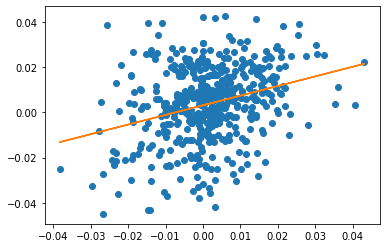

lag 3
1 days return
p value is 4.3572910858576176e-20
slope is 0.226575135281917


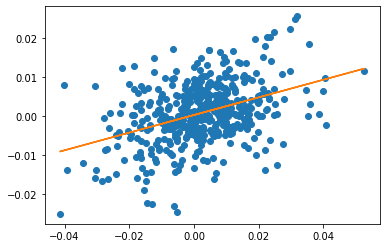

lag 3
2 days return
p value is 2.477214266860061e-19
slope is 0.3131650180940432


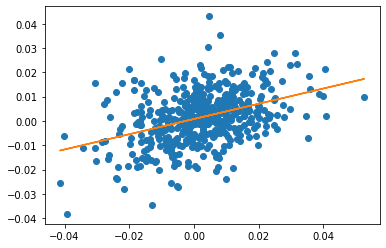

lag 3
3 days return
p value is 3.627454460361538e-16
slope is 0.3476606360448611


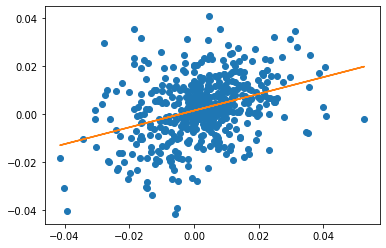

lag 3
4 days return
p value is 4.9598617900815516e-14
slope is 0.3702470602599694


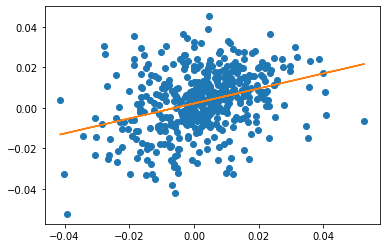

lag 3
5 days return
p value is 4.171631543444398e-09
slope is 0.31892669138881036


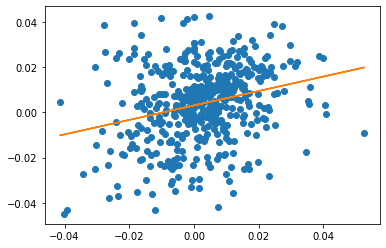

lag 4
1 days return
p value is 2.0202061772734738e-25
slope is 0.22401325351787393


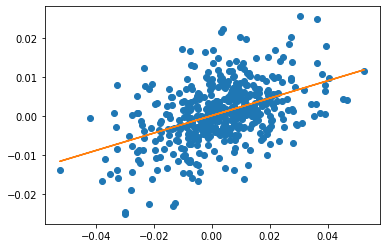

lag 4
2 days return
p value is 1.833623557290666e-18
slope is 0.269797350364403


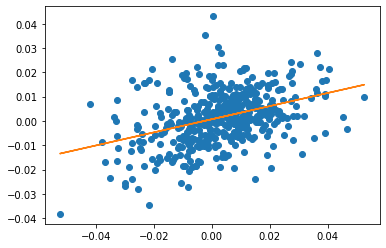

lag 4
3 days return
p value is 3.133000233398547e-14
slope is 0.286813761610907


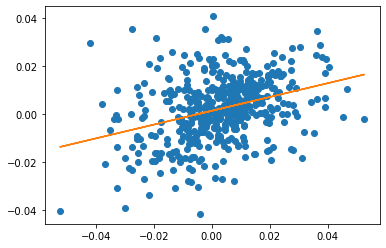

lag 4
4 days return
p value is 1.2301430072593314e-11
slope is 0.29527348010632776


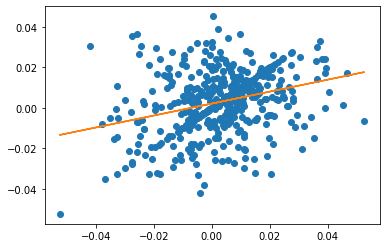

lag 4
5 days return
p value is 1.279159113167695e-07
slope is 0.25355500748504034


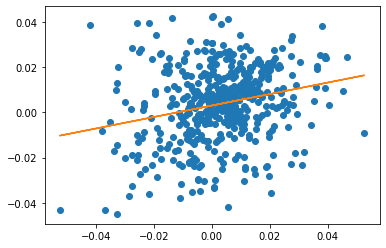

lag 5
1 days return
p value is 1.6669565631116775e-17
slope is 0.1717402275122464


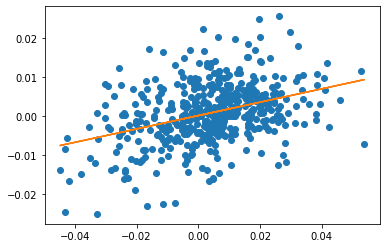

lag 5
2 days return
p value is 1.996890887791502e-12
slope is 0.20223518968952467


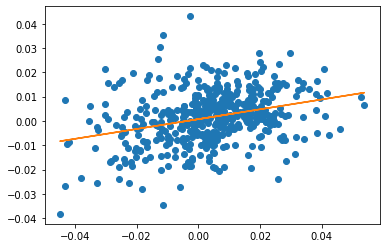

lag 5
3 days return
p value is 2.781853959486978e-09
slope is 0.2092304699800791


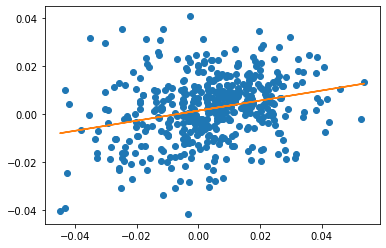

lag 5
4 days return
p value is 1.1550467432388275e-07
slope is 0.21472773045742483


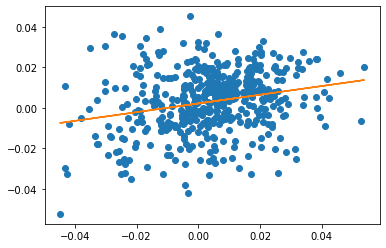

lag 5
5 days return
p value is 0.0001480980044173837
slope is 0.1689788618665051


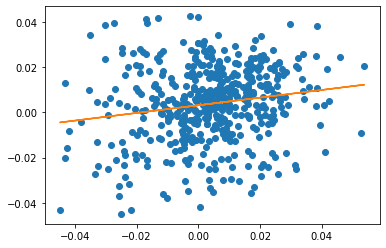

In [32]:
# lets plot return and pit_signal for a simple exploration to find if there is linear relationship
# it seems that we have strong evidence that the slop is not 0 
min_p = 1
best_para = None
for i in range(1,s_days+1):
    x = in_sample[f'{i}_pit_signal']
    for j in range(1, r_days+1):
        print(f'lag {i}')
        print(f'{j} days return')
        y = in_sample[f'{j}day_return']
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        if p_value<min_p:
            min_p = p_value
            best_para = [i,j]
        print(f'p value is {p_value}')
        plt.plot(x, y, 'o') 
        plt.plot(x, slope*x + intercept) 
        print(f"slope is {slope}")
        plt.show()

[1, 1]
lag 1
1 days return
p value is 7.420202744478236e-41
slope is 0.49397783872235446, intercept is 0.0003841307501489898


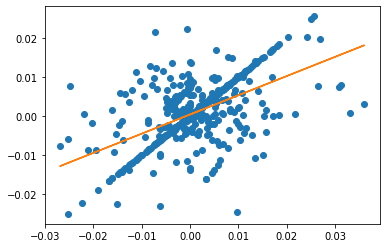

In [33]:
# we use p value as the measure for good parameters, but really that will not matter too much
# we find the signal is good at predicting one day return
print(best_para)
min_p = 1
best_para = None
i,j = 1,1
x = in_sample[f'{i}_pit_signal']
print(f'lag {i}')
print(f'{j} days return')
y = in_sample[f'{j}day_return']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
if p_value<min_p:
    min_p = p_value
    best_para = [i,j]
print(f'p value is {p_value}')
plt.plot(x, y, 'o') 
plt.plot(x, slope*x + intercept) 
print(f"slope is {slope}, intercept is {intercept}")
plt.show()

In [34]:
# lets try to use this simple linear model on training data
# we find the mse from the training 
y_true = np.array(list(in_sample['1day_return']))
y_pred = np.array(list(in_sample['1_pit_signal']*slope + intercept))
def mse(y,y_hat):
    return (y-y_hat).dot(y-y_hat)/len(y)
def accuracy(y, y_hat):
    return np.sum(y*y_hat>0)/len(y_hat)
print(f"mse is {mse(y_true, y_pred)}")
print(f"binary accuracy is {accuracy(y_true, y_pred)}")

mse is 4.033821878596922e-05
binary accuracy is 0.756701030927835


In [35]:
# lets try to use this simple linear model on test
# we find mse and accuracy on test data, oops, seems we overfit the data
y_true = np.array(list(out_sample['1day_return']))
y_pred = np.array(list(out_sample['1_pit_signal']*slope + intercept))
def mse(y,y_hat):
    return (y-y_hat).dot(y-y_hat)/len(y)
print(f"mse is {mse(y_true, y_pred)}")
print(f"binary accuracy is {accuracy(y_true, y_pred)}")

mse is 6.158747826246459e-05
binary accuracy is 0.4876543209876543


lag 1
1 days return


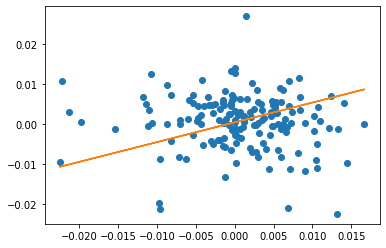

In [36]:
# plot the fitted line on test data
# from the plot it seems we have overfit the data, but there is no obvious best fit line here
i,j = 1,1
x = out_sample[f'{i}_pit_signal']
print(f'lag {i}')
print(f'{j} days return')
y = out_sample[f'{j}day_return']
plt.plot(x, y, 'o') 
plt.plot(x, slope*x + intercept) 
plt.show()

In [37]:
# we have tried a univaraite linear model, lets try something more complicated
# we can create a class that takes model itself as an argument so that we can try any model in sklearn
def fit(model, x, y):
    """
    fit the model with train data
    """
    model.fit(x,y)
    y_hat = model.predict(x)
    plt.title('in sample price')
    plt.plot(np.cumsum(y), label = 'true')
    plt.plot(np.cumsum(y_hat), label = 'pred')
    plt.legend()
    plt.show()
    print(f"mse for training sample is {mse(y,y_hat)}")
    print(f"binary accuracy is {accuracy(y, y_hat)}")
    return mse(y, y_hat), accuracy(y, y_hat), cal_cor(y,y_hat)
    
def predict(model,x):
    return model.predict(x)

def cal_loss(y,y_hat):
    plt.title('out of sample price')
    plt.plot(np.cumsum(y), label = 'true')
    plt.plot(np.cumsum(y_hat), label = 'pred')
    plt.legend()
    plt.show()
    print(f"mse for test sample is {mse(y,y_hat)}")
    print(f"binary accuracy is {accuracy(y, y_hat)}")
    return mse(y, y_hat), accuracy(y, y_hat)

def cal_cor(y, y_hat):
    return np.corrcoef(y,y_hat)[0][1]

In [38]:
# lets take a look at features we need
in_sample.columns

Index(['date', 'signal', 'spy_close_price', 'pit_signal', '1day_return',
       '2day_return', '3day_return', '4day_return', '5day_return',
       '1day_return_signal', '2day_return_signal', '3day_return_signal',
       '4day_return_signal', '5day_return_signal', '1_pit_signal',
       '2_pit_signal', '3_pit_signal', '4_pit_signal', '5_pit_signal'],
      dtype='object')

In [39]:
# generate data uses all features
def generate_data(return_lag=1):
    """
    generate train and test data with customized lag
    """
    x = np.array(in_sample[['1day_return_signal', '2day_return_signal', '3day_return_signal',
       '4day_return_signal', '5day_return_signal','1_pit_signal',
       '2_pit_signal', '3_pit_signal', '4_pit_signal', '5_pit_signal']])
    y = np.array(in_sample[f'{return_lag}day_return'])
    x_test = np.array(out_sample[['1day_return_signal', '2day_return_signal', '3day_return_signal',
       '4day_return_signal', '5day_return_signal','1_pit_signal',
       '2_pit_signal', '3_pit_signal', '4_pit_signal', '5_pit_signal' ]])
    y_test = np.array(out_sample[f'{return_lag}day_return'])
    return x,y,x_test,y_test

# generate data uses part of the features
def generate_partial_data(return_lag=1):
    """
    generate train and test data with customized lag
    """
    x = np.array(in_sample[['1_pit_signal',
       '2_pit_signal', '3_pit_signal', '4_pit_signal', '5_pit_signal']])
    y = np.array(in_sample[f'{return_lag}day_return'])
    x_test = np.array(out_sample[['1_pit_signal',
       '2_pit_signal', '3_pit_signal', '4_pit_signal', '5_pit_signal' ]])
    y_test = np.array(out_sample[f'{return_lag}day_return'])
    return x,y,x_test,y_test

In [40]:
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [41]:
# lets also have a benchmark
# so that we know if we can do better than knowing nothing
class bm: 
    def __init__(self):
        self.side = 0
        
    def fit(self,x,y):
        neg = sum(y<0)
        pos = sum(y>0)
        self.side = -1 if neg>pos else 1
        return None
    
    def predict(self,x):
        return np.ones(len(x))*1e-5*self.side

return lag 1


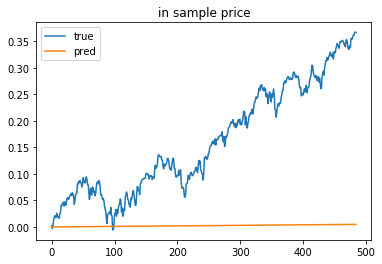

mse for training sample is 5.9031619067527816e-05
binary accuracy is 0.5587628865979382


/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


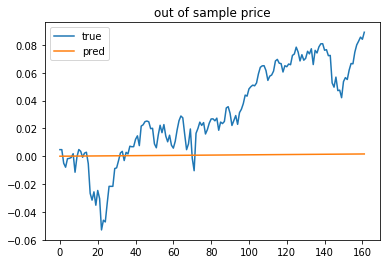

mse for test sample is 4.6644565440870466e-05
binary accuracy is 0.5987654320987654
return lag 2


/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


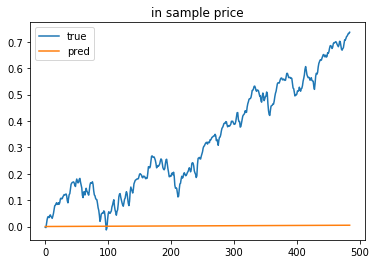

mse for training sample is 0.00011832850989031692
binary accuracy is 0.5773195876288659


/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


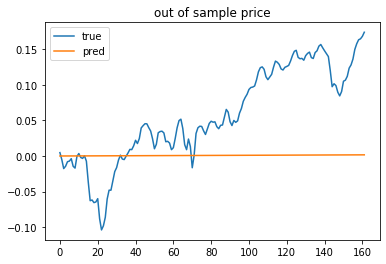

mse for test sample is 8.908847906866789e-05
binary accuracy is 0.6172839506172839
return lag 3


/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


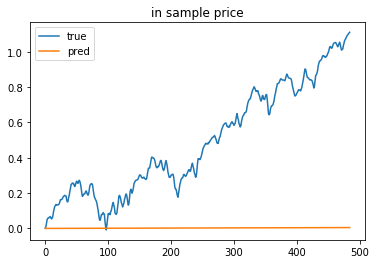

mse for training sample is 0.0001766935395458362
binary accuracy is 0.6041237113402061


/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


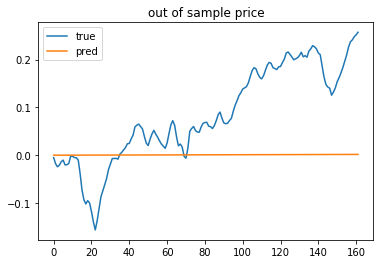

mse for test sample is 0.00012108586621762176
binary accuracy is 0.5925925925925926
return lag 4


/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


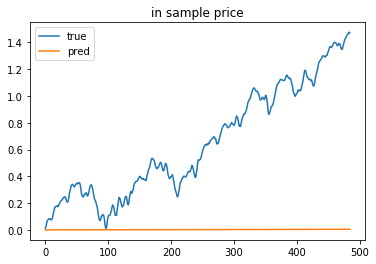

mse for training sample is 0.0002346061938409182
binary accuracy is 0.6041237113402061


/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


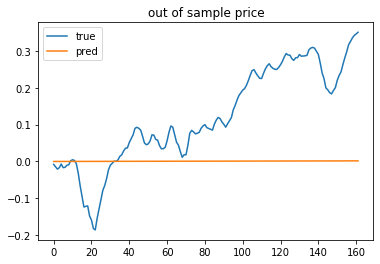

mse for test sample is 0.00016030247230745527
binary accuracy is 0.5987654320987654
return lag 5


/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


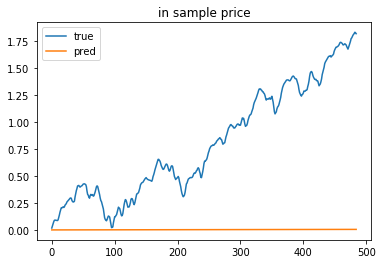

mse for training sample is 0.0002826092632097041
binary accuracy is 0.6329896907216495


/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


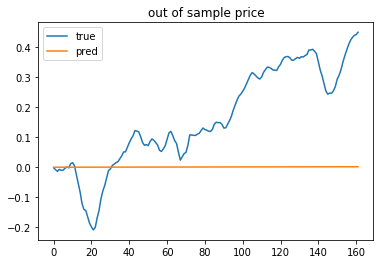

mse for test sample is 0.0001952592922220764
binary accuracy is 0.6049382716049383


/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jingang/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [42]:
# benchmark performance
# we notice that the mse is about the same with that from 
bm_test_stats = {}
bm_train_stats = {}
for i in range(1,6):
    print(f"return lag {i}")
    x,y,x_test,y_test = generate_data(i)
    m_bm = bm()
    bm_train_mse, bm_train_arr, train_corr = fit(m_bm, x, y)
    bm_train_stats[i] = [bm_train_mse, bm_train_arr, train_corr]
    bm_pred = predict(m_bm, x_test)
    bm_test_mse, bm_test_arr = cal_loss(y_test, bm_pred)
    test_corr = cal_cor(y_test, bm_pred)
    bm_test_stats[i] = [bm_test_mse, bm_test_arr, test_corr]

return lag 1


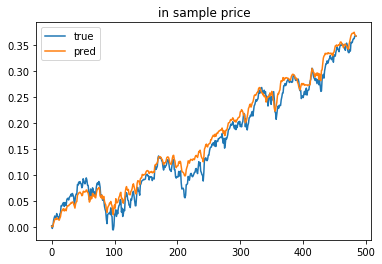

mse for training sample is 3.481525751255028e-05
binary accuracy is 0.7422680412371134


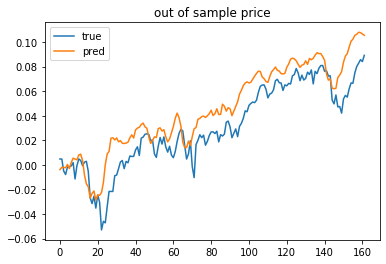

mse for test sample is 5.102401443435143e-05
binary accuracy is 0.6172839506172839
return lag 2


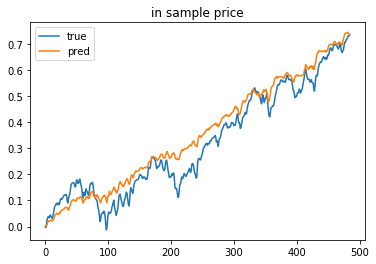

mse for training sample is 7.996397428161211e-05
binary accuracy is 0.7030927835051546


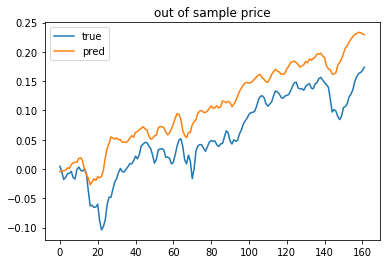

mse for test sample is 7.588267954768227e-05
binary accuracy is 0.691358024691358
return lag 3


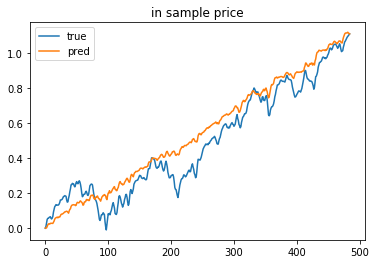

mse for training sample is 0.00012727986322557885
binary accuracy is 0.7072164948453609


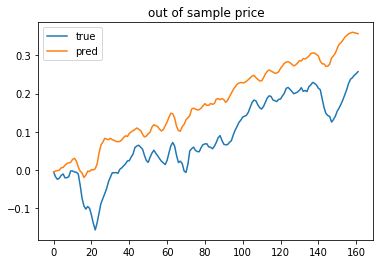

mse for test sample is 8.450346879676795e-05
binary accuracy is 0.7345679012345679
return lag 4


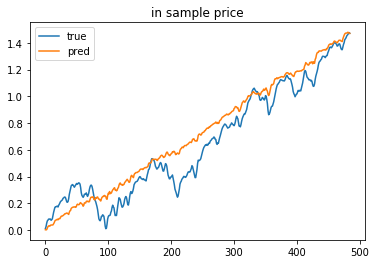

mse for training sample is 0.00016644549150870161
binary accuracy is 0.6865979381443299


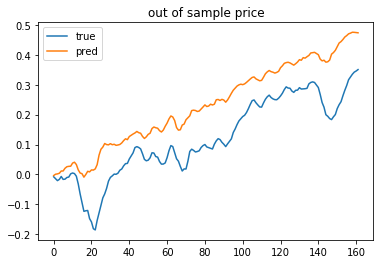

mse for test sample is 8.888836594266442e-05
binary accuracy is 0.7962962962962963
return lag 5


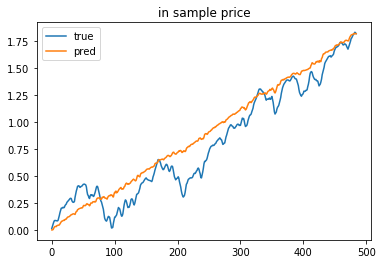

mse for training sample is 0.00022015844850930042
binary accuracy is 0.668041237113402


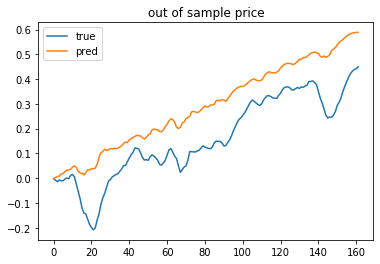

mse for test sample is 0.00012912681086184324
binary accuracy is 0.7469135802469136


In [43]:
# multivariate lasso regression
m0_test_stats = {}
m0_train_stats = {}
for i in range(1,6):
    print(f"return lag {i}")
    x,y,x_test,y_test = generate_data(i)
    m0 = linear_model.Lasso(alpha=1e-6)
    m0_train_mse, m0_train_arr, train_corr = fit(m0, x, y)
    m0_train_stats[i] = [m0_train_mse, m0_train_arr, train_corr]
    m0_pred = predict(m0, x_test)
    m0_test_mse, m0_test_arr = cal_loss(y_test, m0_pred)
    test_corr = cal_cor(y_test, m0_pred)
    m0_test_stats[i] = [m0_test_mse, m0_test_arr, test_corr]
    


return lag 1


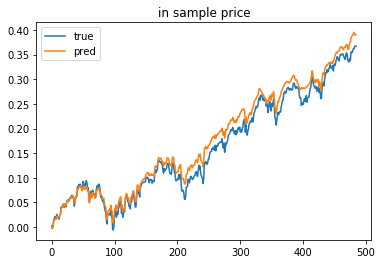

mse for training sample is 1.2742815961060259e-05
binary accuracy is 0.8536082474226804


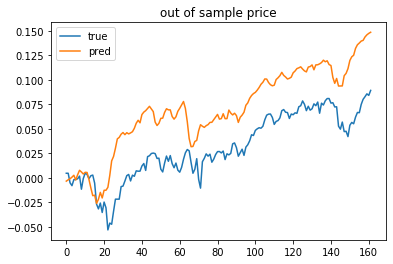

mse for test sample is 5.536309252611886e-05
binary accuracy is 0.5802469135802469
return lag 2


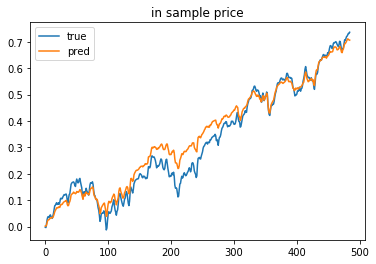

mse for training sample is 2.8715573821171543e-05
binary accuracy is 0.8329896907216495


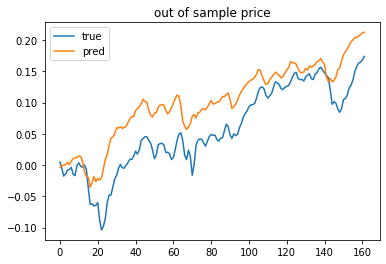

mse for test sample is 8.525571878991514e-05
binary accuracy is 0.7037037037037037
return lag 3


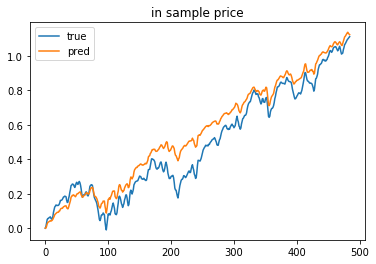

mse for training sample is 4.7008448677626324e-05
binary accuracy is 0.8391752577319588


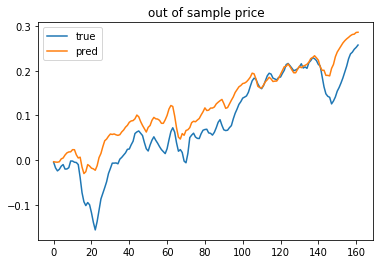

mse for test sample is 7.469135032047889e-05
binary accuracy is 0.8209876543209876
return lag 4


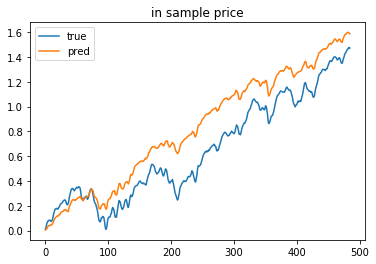

mse for training sample is 6.307688068042793e-05
binary accuracy is 0.8268041237113402


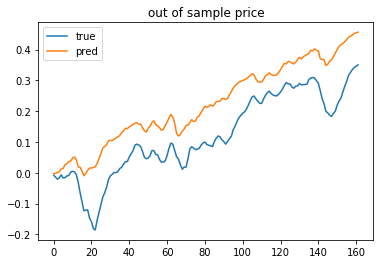

mse for test sample is 8.439898943718849e-05
binary accuracy is 0.8148148148148148
return lag 5


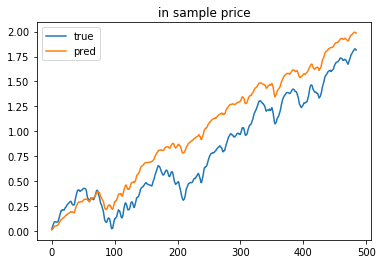

mse for training sample is 8.235589471410351e-05
binary accuracy is 0.8329896907216495


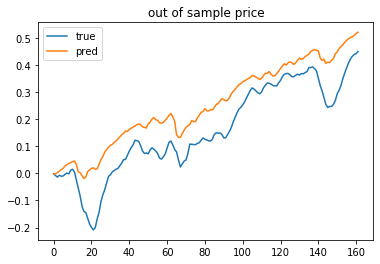

mse for test sample is 0.0001275729922064184
binary accuracy is 0.7592592592592593


In [44]:
# GBT
m1_test_stats = {}
m1_train_stats = {}
for i in range(1,6):
    print(f"return lag {i}")
    x,y,x_test,y_test = generate_data(i)
    m1 = GradientBoostingRegressor(loss='huber')
    m1_train_mse, m1_train_arr, train_corr = fit(m1, x, y)
    m1_train_stats[i] = [m1_train_mse, m1_train_arr, train_corr]
    m1_pred = predict(m1, x_test)
    m1_test_mse, m1_test_arr = cal_loss(y_test, m1_pred)
    test_corr = cal_cor(y_test, m1_pred)
    m1_test_stats[i] = [m1_test_mse, m1_test_arr, test_corr]
    


return lag 1


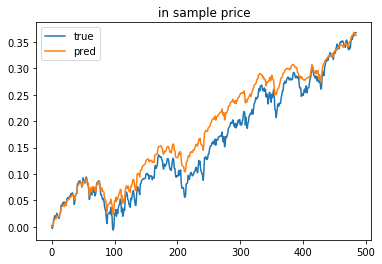

mse for training sample is 2.03448413688754e-05
binary accuracy is 0.7896907216494845


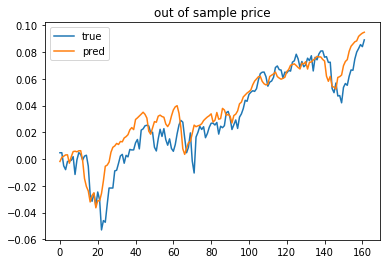

mse for test sample is 5.643878436009668e-05
binary accuracy is 0.5925925925925926
return lag 2


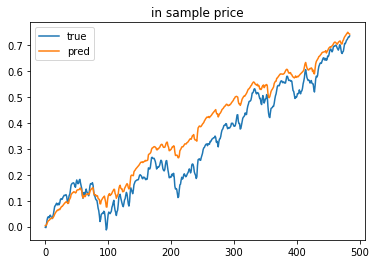

mse for training sample is 5.013924082150298e-05
binary accuracy is 0.7422680412371134


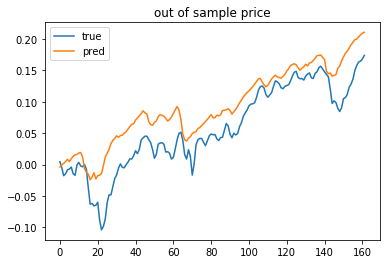

mse for test sample is 8.088790865689932e-05
binary accuracy is 0.7160493827160493
return lag 3


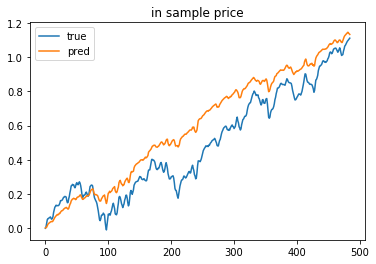

mse for training sample is 7.530488898867104e-05
binary accuracy is 0.7670103092783506


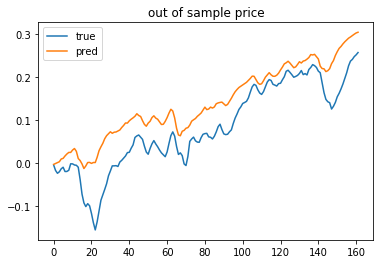

mse for test sample is 7.779370789707885e-05
binary accuracy is 0.7592592592592593
return lag 4


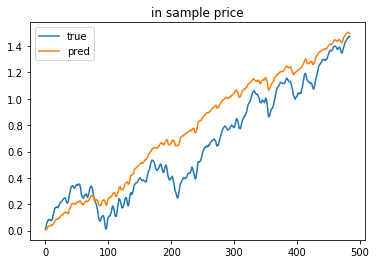

mse for training sample is 0.00010196048371074456
binary accuracy is 0.7731958762886598


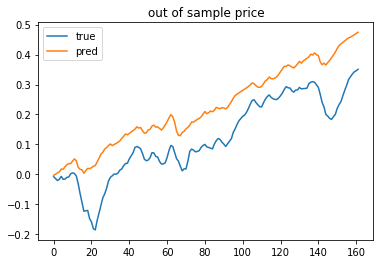

mse for test sample is 8.685415832285642e-05
binary accuracy is 0.7962962962962963
return lag 5


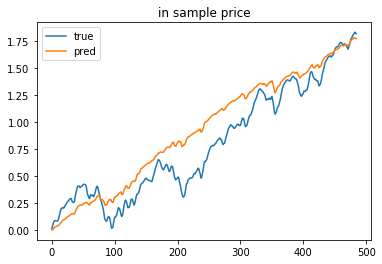

mse for training sample is 0.00014280340307965198
binary accuracy is 0.7670103092783506


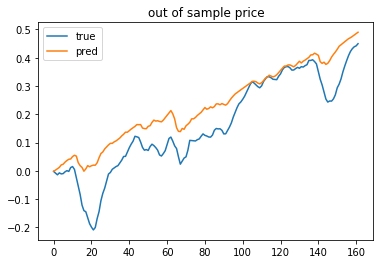

mse for test sample is 0.00011828506105549574
binary accuracy is 0.7407407407407407


In [45]:
# RF
m2_test_stats = {}
m2_train_stats = {}
for i in range(1,6):
    print(f"return lag {i}")
    x,y,x_test,y_test = generate_data(i)
    m2 = RandomForestRegressor(n_estimators=200, max_depth=5)
    m2_train_mse, m2_train_arr, train_corr = fit(m2, x, y)
    m2_train_stats[i] = [m2_train_mse, m2_train_arr, train_corr]
    m2_pred = predict(m2, x_test)
    m2_test_mse, m2_test_arr = cal_loss(y_test, m2_pred)
    test_corr = cal_cor(y_test, m2_pred)
    m2_test_stats[i] = [m2_test_mse, m2_test_arr, test_corr]


In [46]:
# lets have some summary data
train_stats = {"benchmark":bm_train_stats,"lasso":m0_train_stats,"GBT":m1_train_stats,"RF":m2_train_stats}
test_stats = {"benchmark":bm_test_stats,"lasso":m0_test_stats,"GBT":m1_test_stats,"RF":m2_test_stats}

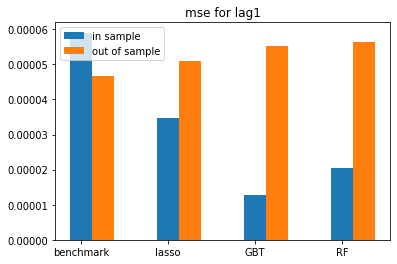

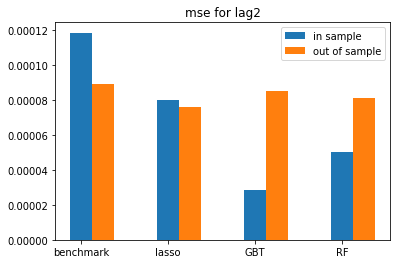

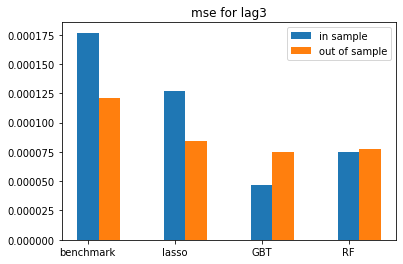

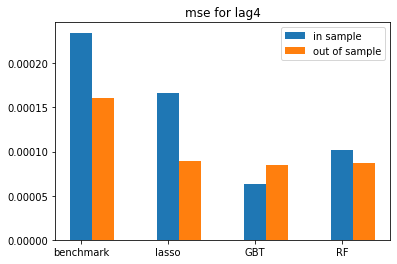

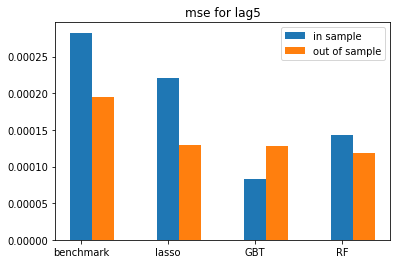

In [47]:
names = np.array(list(train_stats))
# MSE
for i in range(1,6):
    train_mse = []
    test_mse = []
    for name in names:
        train_mse.append(train_stats[name][i][0])
    for name in names:
        test_mse.append(test_stats[name][i][0])
    plt.title(f'mse for lag{i}')
    plt.bar(np.arange(4),train_mse,width = 0.25, label='in sample')
    plt.bar(np.arange(4)+0.25,test_mse,width = 0.25, label='out of sample')
    plt.xticks(np.arange(4),names)
    plt.legend()
    plt.show()

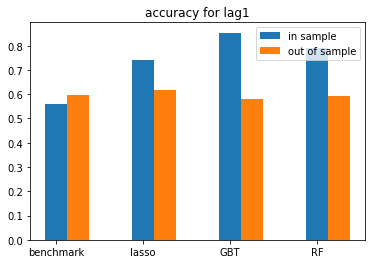

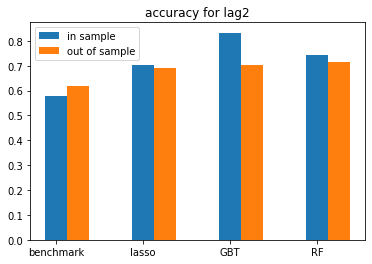

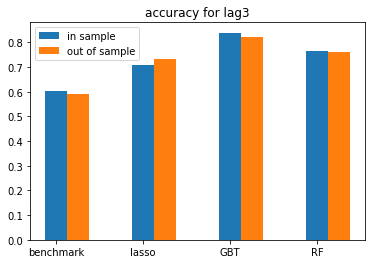

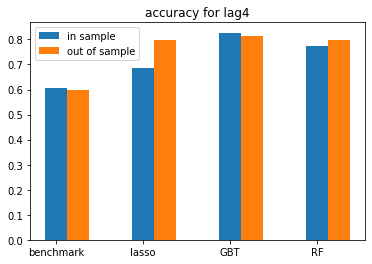

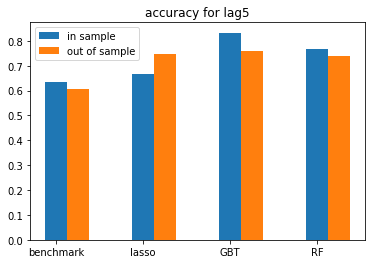

In [48]:
# accuracy
for i in range(1,6):
    train_mse = []
    test_mse = []
    for name in names:
        train_mse.append(train_stats[name][i][1])
    for name in names:
        test_mse.append(test_stats[name][i][1])
    plt.title(f'accuracy for lag{i}')
    plt.bar(np.arange(4),train_mse,width = 0.25, label='in sample')
    plt.bar(np.arange(4)+0.25,test_mse,width = 0.25, label='out of sample')
    plt.xticks(np.arange(4),names)
    plt.legend()
    plt.show()

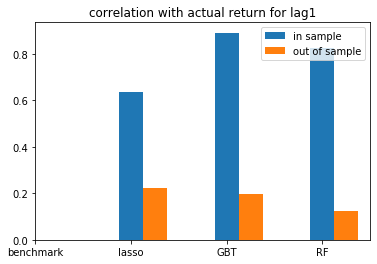

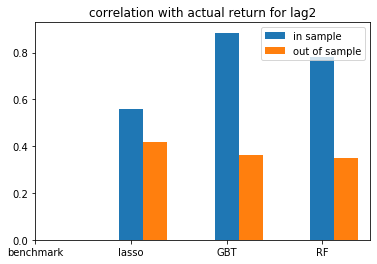

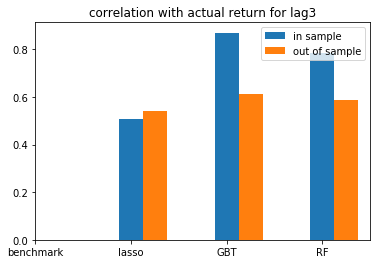

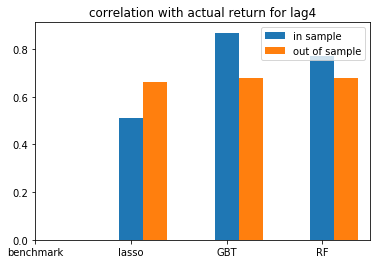

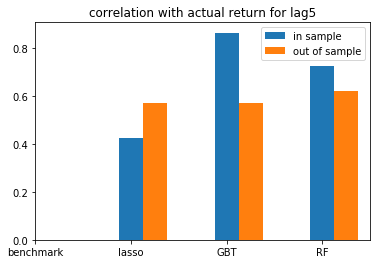

In [49]:
# accuracy
for i in range(1,6):
    train_mse = []
    test_mse = []
    for name in names:
        train_mse.append(train_stats[name][i][2])
    for name in names:
        test_mse.append(test_stats[name][i][2])
    plt.title(f'correlation with actual return for lag{i}')
    plt.bar(np.arange(4),train_mse,width = 0.25, label='in sample')
    plt.bar(np.arange(4)+0.25,test_mse,width = 0.25, label='out of sample')
    plt.xticks(np.arange(4),names)
    plt.legend()
    plt.show()

In [50]:
# some general observation:
# regression is much more difficult than classification
# its difficult to beat benchmark in MSE
# lasso is more robust than other regressor in this problem, the decision boundary is rather clear in this case
# this is of course a one time thing, if we really have time to built the infrastructure
# we can observe the performance of an online updating algorithm
# in fact, if we do the test in a rolling fashion, I think it will not be able to beat the benchmark

In [51]:
# now lets try to profit with the signal
# we will need to define a backtesting machine that is able to see how much we can make from the signal
# we will need a data module to load the signal and return
# a simulation module to run simulation and a strategy module to run the strategy
# I have already built this in my github, so just copy the basic functions that I need
import pickle
import datetime


dates = np.array(list(working_data['date'])).astype(str)
signal = list(working_data['signal'])
close_price = list(working_data['spy_close_price'])

# lag signal by 1 day
signals = {}
yesterday = None
for i, date in enumerate(dates):
    if yesterday:
        signals[yesterday] = signal[i]
    yesterday = date

class ConfigParser:
    def __init__(self, config):
        self.config = config

    def parse(self, name, default):
        return self.config[name] if name in self.config else default

class DataHandler:
    def __init__(self, start_date, end_date):
        """
        :param start_date:
        :param end_date:
        :param data_id:
        """
        global dates
        global close_price
        self.start_date = start_date
        self.end_date = end_date
        prev_price = None
        dates = sorted(dates)
        self.returns = {}
        for i,date in enumerate(dates):
            if self.start_date<=date<=self.end_date and prev_price:
                ret = (close_price[i]-prev_price)/prev_price 
                self.returns[date] = {}
                self.returns[date]['spy'] = ret
            prev_price = close_price[i]

    def load_returns(self):
        return self.returns
    
import abc
class Strategy:
    def __init__(self):
        self.today = None
        self.yesterday = None
        self.yesterday_close_returns = None
        self.portfolio_weights = {}
        self.portfolio_weights_by_date = {}

    def set_today(self, today):
        """
        set today
        :param today:
        :return:
        """
        self.today = today

    def set_yesterday(self, yesterday):
        """
        set yesterday
        :param yesterday:
        :return:
        """
        self.yesterday = yesterday

    def set_yesterday_close_returns(self, yesterday_close_returns):
        self.yesterday_close_returns = yesterday_close_returns

    def set_yesterday_spy_return(self, yesterday_spy_return):
        self.yesterday_spy_return = yesterday_spy_return

    @abc.abstractmethod
    def trade(self):
        raise NotImplementedError("Please Implement this method")

    def update_weights(self):
        self.portfolio_weights_by_date[self.today] = self.portfolio_weights
        
    
class Backtest:
    def __init__(self, config):
        """
        backtest class
        :param config:
        """
        self.config_parser = ConfigParser(config)
        self.start_date = self.config_parser.parse('start_date', '20010101')
        self.end_date = self.config_parser.parse('end_date', datetime.datetime.now().strftime("%Y%m%d"))
        self.evaluate = self.config_parser.parse('evaluate', False)
        # load trade dates, returns
        self.data_handler = DataHandler(self.start_date, self.end_date)
        self.returns = self.data_handler.load_returns()
        self.trade_dates = sorted(list(self.returns))
        self.yesterday = self.trade_dates[0]

    def get_yesterday_close_returns(self, date):
        return self.returns[date]

    def run_daily(self, strategy, date):
        """
        run backtest for one day
        :param strategy:
        :param date:
        :return:
        """
        strategy.set_today(date)
        yesterday_close_returns = self.get_yesterday_close_returns(self.yesterday)
        strategy.set_yesterday_close_returns(yesterday_close_returns)
        strategy.trade()
        strategy.update_weights()
        self.yesterday = date

    def run(self, strategy):
        """
        run the strategy from start_date to end_date
        :param strategy:
        :return:
        """
        for i, date in enumerate(self.trade_dates[1:]):
            print('\r progress:{0:.1f}%'.format((i+1)/(len(self.trade_dates)-1)*100),end='',flush=True)
            self.run_daily(strategy, date)
        print('\r finished')
        # find stats
        if self.evaluate:
            self.evaluator = Evaluator(strategy.portfolio_weights_by_date, self.returns)
            self.evaluator.evaluate()
            
class Evaluator:
    def __init__(self, portfolio_weights_by_date, returns_by_date):
        self.portfolio_weights_by_date = portfolio_weights_by_date
        self.returns_by_date = returns_by_date

    def evaluate(self):
        # pwbd_t-1 corresponds to return_t
        dates = sorted(list(set(self.portfolio_weights_by_date).intersection(set(self.returns_by_date))))
        yesterday = None
        ret_by_date = {}
        total = 0
        correct = 0
        for date in dates:
            if yesterday:
                ret = 0
                for qaid in self.portfolio_weights_by_date[yesterday]:
                    if qaid in self.returns_by_date[date]:
                        ret += self.portfolio_weights_by_date[yesterday][qaid] * self.returns_by_date[date][qaid]
                        if ret>0:
                            correct+=1
                ret_by_date[date] = ret
                total += 1
            yesterday = date
        self.plot_return(ret_by_date)


        print(f"accuracy is {correct/total}, total prediction is:{total}, correct prediction is:{correct}")

    def plot_return(self, ret_by_date):
        dates = np.array(sorted(list(ret_by_date)))
        rets = []
        for date in dates:
            rets.append(ret_by_date[date])
        x_label_index = np.linspace(0,len(dates)-1,10).astype(int)
        x_label = dates[x_label_index]
        plt.figure(figsize=(10, 5))
        plt.plot(dates, np.cumsum(rets))
        plt.xticks(x_label_index, x_label, rotation='vertical')
        plt.title('cumulative return plot')

In [52]:
# run a strategy
# we use 5 days signals to predict 5 days returns
# lets try a simple EWA algorithm

from collections import deque
class RunFeature(Strategy):
    def __init__(self, signals, num_expert, num_day, lr=0.1):
        super(RunFeature, self).__init__()
        self.signals = signals
        self.num_expert = num_expert
        self.feature = deque(maxlen=self.num_expert+1)
        self.temp = deque(maxlen = num_day)
        self.weight = np.ones(self.num_expert)
        self.expert_pred = np.zeros(self.num_expert)
        self.lr = lr
        self.num_day = num_day
        self.ret_deque = deque(maxlen=num_day)
        self.pred_deque = deque(maxlen=num_day)
    
    def trade(self):
        self.portfolio_weights = {}
        # record return
        ret = self.yesterday_close_returns['spy']
        self.ret_deque.append(ret)
        # update weight
        if len(self.pred_deque)==self.num_day and len(self.ret_deque)==self.num_day:
            return_mean = np.mean(self.ret_deque)
            previous_pred = self.pred_deque[0]
            for i in range(len(previous_pred)):
                if previous_pred[i]*return_mean<0:
                    self.weight[i] *= np.exp(-(self.lr))
            self.weight/=np.sum(self.weight)
        
        if self.today in self.signals:
            self.feature.append(self.signals[self.today])
            if len(self.feature)==self.num_expert+1:
                for i in range(self.num_expert):
                    self.expert_pred[i] = self.feature[-1]/self.feature[i]-1
                self.pred_deque.append(self.expert_pred.copy())
                pred = self.expert_pred.dot(self.weight)
                self.temp.append(pred)
                self.portfolio_weights['spy'] = np.sign(np.mean(self.temp))
                
class Benchmark(Strategy):
    def __init__(self):
        super(Benchmark, self).__init__()
    
    def trade(self):
        self.portfolio_weights = {}
        self.portfolio_weights['spy']=1

In [53]:
# let test in sample
config = {'start_date':'20120111',
          "end_date":'20131227',
          'evaluate':True}

bt = Backtest(config)
rf = RunFeature(signals, 5, 5)
bm = Benchmark()

 finished:100.0%
accuracy is 0.5601659751037344, total prediction is:482, correct prediction is:270
 finished:100.0%
accuracy is 0.6493775933609959, total prediction is:482, correct prediction is:313


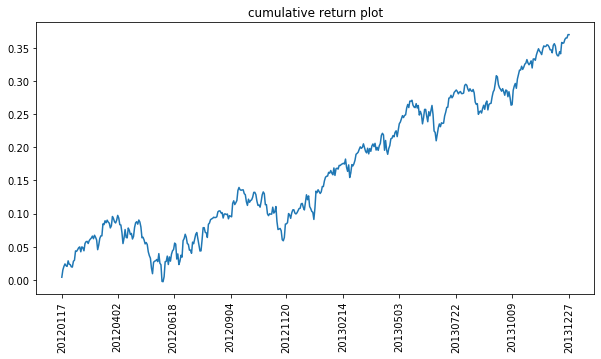

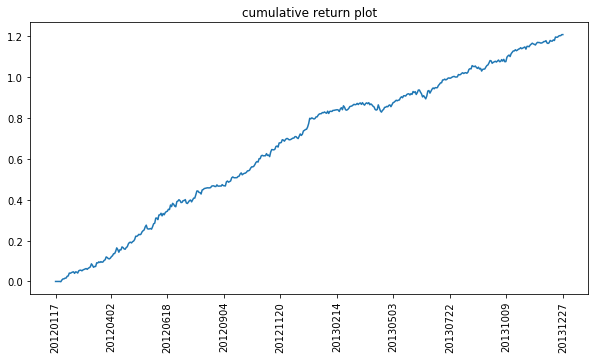

In [54]:
bt.run(bm)
bt.run(rf)

In [55]:
# we can find the feature importance
rf.weight

array([3.82469635e-01, 4.22694318e-01, 1.89928800e-01, 4.69570971e-03,
       2.11537977e-04])

In [56]:
# in sample looks good
# let test out of sample
config = {'start_date':'20131230',
          "end_date":'20140820',
          'evaluate':True}

bt = Backtest(config)
rf = RunFeature(signals, 5, 5, 0.1)
rf.weight = np.array([3.82469635e-01, 4.22694318e-01, 1.89928800e-01, 4.69570971e-03,
       2.11537977e-04])

 finished:100.0%
accuracy is 0.5949367088607594, total prediction is:158, correct prediction is:94
 finished:100.0%
accuracy is 0.6075949367088608, total prediction is:158, correct prediction is:96


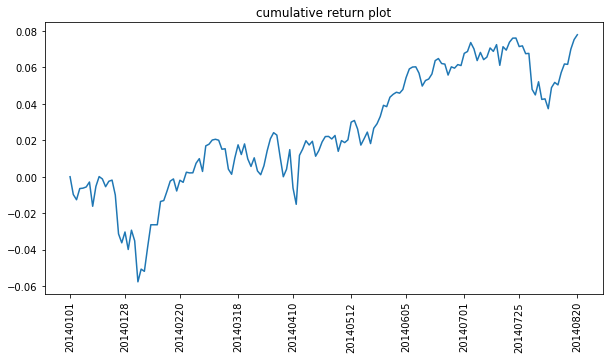

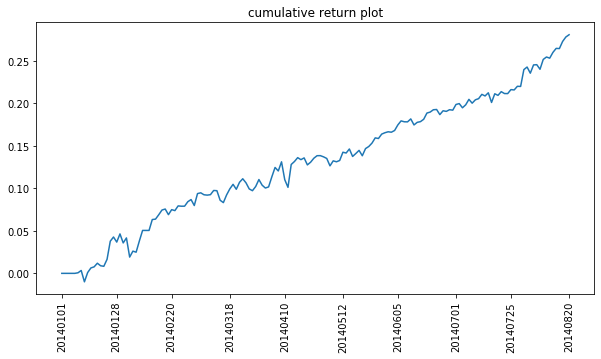

In [57]:
bt.run(bm)
bt.run(rf)

In [58]:
# we can find the feature importance
rf.weight

array([5.93564394e-01, 3.25755046e-01, 8.03302054e-02, 3.28291189e-04,
       2.20629777e-05])